In [1]:
# Check distributed and lumped shapefiles

In [16]:
import geopandas as gpd
import glob
import os
import pandas as pd
from pathlib import Path

In [5]:
base_folder = Path('/scratch/gwf/gwf_cmt/wknoben/camels-spat-upload/shapefiles')
main_folders = ['headwater','meso-scale','macro-scale']

In [23]:
### lumped

# collect all files
lumped_shp_files = []
for main_folder in main_folders:
    tmp_fold = base_folder / main_folder / 'shapes-lumped'
    basin_folders = [ f.path for f in os.scandir(tmp_fold) if f.is_dir() ]
    for basin_folder in basin_folders:
        lumped_shp_files.append(glob.glob(basin_folder + '/*.shp')[0])

In [18]:
# Load the shapes
gdf_merged = gpd.GeoDataFrame(pd.concat([gpd.read_file(shp) for shp in lumped_shp_files], ignore_index=True))

/opt/software/custom/software/2020/avx2/MPI/gcc9/openmpi4/geo-stack/2022a/lib/python3.10/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

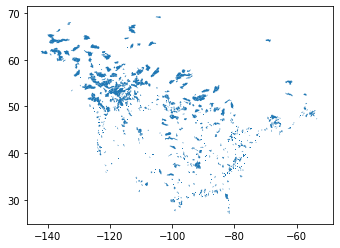

In [20]:
gdf_merged.plot()

In [22]:
### distributed

# collect all files
dist_shp_files = []
for main_folder in main_folders:
    tmp_fold = base_folder / main_folder / 'shapes-distributed'
    basin_folders = [ f.path for f in os.scandir(tmp_fold) if f.is_dir() ]
    for basin_folder in basin_folders:
        dist_shp_files.append(glob.glob(basin_folder + '/*.shp')[0])

In [25]:
gdf_dist = gpd.GeoDataFrame(pd.concat([gpd.read_file(shp) for shp in dist_shp_files], ignore_index=True))

/opt/software/custom/software/2020/avx2/MPI/gcc9/openmpi4/geo-stack/2022a/lib/python3.10/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/opt/software/custom/software/2020/avx2/MPI/gcc9/openmpi4/geo-stack/2022a/lib/python3.10/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

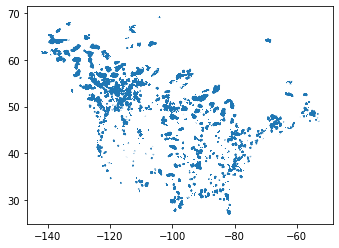

In [26]:
gdf_dist.plot()